In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/recordes-de-corrida/tabela 1.9.txt
/kaggle/input/recordes-de-corrida/tabela8.6.txt
/kaggle/input/temperatura-umidade-e-evaporao-r-j-freund/tabela q1.txt


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Questão 1

In [3]:
tabela_q1 = pd.read_table('/kaggle/input/temperatura-umidade-e-evaporao-r-j-freund/tabela q1.txt',header=None,delim_whitespace=True)
tabela_q1.columns = ["y1", "y2", "y3", "y4", "y5", "y6", "y7", "y8", "y9", "y10", "y11"]
tabela_q1.head() 

/tmp/ipykernel_33/467286846.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tabela_q1 = pd.read_table('/kaggle/input/temperatura-umidade-e-evaporao-r-j-freund/tabela q1.txt',header=None,delim_whitespace=True)


,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11
0,84,65,147,85,59,151,95,40,398,273,30
1,84,65,149,86,61,159,94,28,345,140,34
2,79,66,142,83,64,152,94,41,368,318,33
3,81,67,147,83,65,158,94,50,406,282,26
4,84,68,167,88,69,180,93,46,379,311,41


Correlation Matrix:
            y1        y2        y3        y4        y5        y6        y7  \
y1   1.000000  0.670459  0.785039  0.713635  0.379570  0.625617 -0.173342   
y2   0.670459  1.000000  0.932418  0.839955  0.680852  0.818518 -0.165684   
y3   0.785039  0.932418  1.000000  0.914318  0.590701  0.869472 -0.159723   
y4   0.713635  0.839955  0.914318  1.000000  0.570488  0.875134 -0.103365   
y5   0.379570  0.680852  0.590701  0.570488  1.000000  0.780809 -0.121508   
y6   0.625617  0.818518  0.869472  0.875134  0.780809  1.000000 -0.040585   
y7  -0.173342 -0.165684 -0.159723 -0.103365 -0.121508 -0.040585  1.000000   
y8  -0.570084 -0.339818 -0.534712 -0.526684  0.190872 -0.303904  0.172115   
y9  -0.577635 -0.452704 -0.649241 -0.625687 -0.039984 -0.503161  0.278057   
y10 -0.187953  0.030386 -0.098453 -0.089943  0.410887  0.123938 -0.146875   
y11  0.562100  0.538896  0.687562  0.723333  0.327759  0.708682 -0.183803   

           y8        y9       y10       y11  
y1  -0.5

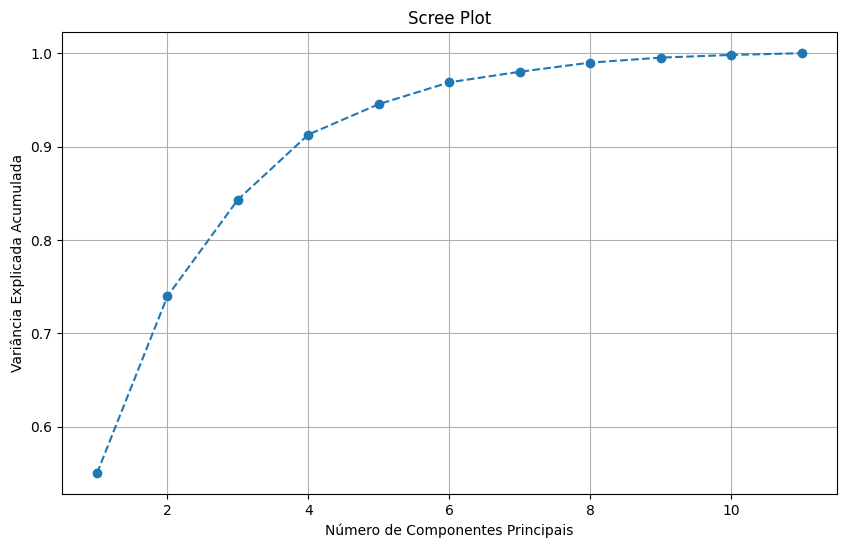

In [23]:
# Calcular a matriz de correlação
correlation_matrix = tabela_q1.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Padronização dos dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(tabela_q1)

# Calcular a matriz de covariância dos dados padronizados
covariance_matrix = np.cov(data_scaled, rowvar=False)
print("Covariance Matrix:\n", covariance_matrix)

# Aplicação da PCA
pca = PCA()
pca.fit(data_scaled)

# Variância explicada
explained_variance = pca.explained_variance_ratio_
explained_variance_cumsum = np.cumsum(explained_variance)
explained_variance_df = pd.DataFrame({
    'Component': range(1, len(explained_variance) + 1),
    'Variance_Explained': explained_variance,
    'Cumulative_Variance_Explained': explained_variance_cumsum
})

# Exibir a tabela de variâncias explicadas
print(np.transpose(explained_variance_df))

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_df['Component'], explained_variance_df['Cumulative_Variance_Explained'], marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()


In [26]:
round(np.transpose(explained_variance_df)*100,2)

,0,1,2,3,4,5,6,7,8,9,10
Component,100.00,200.00,300.00,400.00,500.00,600.00,700.00,800.00,900.00,1000.00,1100.00
Variance_Explained,55.03,18.96,10.33,6.97,3.26,2.34,1.13,0.98,0.53,0.29,0.18
Cumulative_Variance_Explained,55.03,73.99,84.32,91.29,94.55,96.88,98.01,99.00,99.53,99.82,100.00


In [42]:
print("Primeira Componente Principal: ",pca.components_[0:1])
print("Segunda Componente Principal: ",pca.components_[1:2])
print("Terceira Componente Principal: ",pca.components_[2:3])
print("Quarta Componente Principal: ",pca.components_[3:4])

Primeira Componente Principal:  [[-0.3294982  -0.35265814 -0.39072946 -0.38043982 -0.2313135  -0.36070001
   0.08902412  0.26058246  0.31153742  0.02271676 -0.33563171]]
Segunda Componente Principal:  [[ 0.07805701 -0.19822345 -0.05633223 -0.05218239 -0.53510112 -0.2405401
  -0.03042597 -0.49019644 -0.36869958 -0.46107206  0.12157464]]
Terceira Componente Principal:  [[ 0.096284    0.10708815  0.11487751  0.13650179  0.00263238  0.11534703
   0.78124554  0.09970789  0.20212851 -0.48968358 -0.18217539]]
Quarta Componente Principal:  [[-0.27723066 -0.22547128 -0.14110691 -0.0119847  -0.06393415  0.1351658
   0.56009945 -0.16517059 -0.21456211  0.49868976  0.44065022]]


# Questão 2

## Parte 2 - Feminina

In [5]:
tabela_1_9 = pd.read_table('/kaggle/input/recordes-de-corrida/tabela 1.9.txt',header=None,delim_whitespace=True)
tabela_1_9.head(3)

/tmp/ipykernel_33/3789572935.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tabela_1_9 = pd.read_table('/kaggle/input/recordes-de-corrida/tabela 1.9.txt',header=None,delim_whitespace=True)


,0,1,2,3,4,5,6,7
0,ARG,11.57,22.94,52.50,2.05,4.25,9.19,150.32
1,AUS,11.12,22.23,48.63,1.98,4.02,8.63,143.51
2,AUT,11.15,22.70,50.62,1.94,4.05,8.78,154.35


Correlation Matrix:
                 100m(s)   200m(s)   400m(s)  800m(min)  1500m(min)  \
100m(s)        1.000000  0.941089  0.870780   0.809176    0.781551   
200m(s)        0.941089  1.000000  0.908810   0.819826    0.801328   
400m(s)        0.870780  0.908810  1.000000   0.805790    0.719800   
800m(min)      0.809176  0.819826  0.805790   1.000000    0.905051   
1500m(min)     0.781551  0.801328  0.719800   0.905051    1.000000   
3000m(min)     0.727878  0.731855  0.673799   0.866573    0.973380   
Marathon(min)  0.668960  0.679954  0.676938   0.853990    0.790557   

               3000m(min)  Marathon(min)  
100m(s)          0.727878       0.668960  
200m(s)          0.731855       0.679954  
400m(s)          0.673799       0.676938  
800m(min)        0.866573       0.853990  
1500m(min)       0.973380       0.790557  
3000m(min)       1.000000       0.798730  
Marathon(min)    0.798730       1.000000  
Autovalores:
 [5.80762446 0.62869342 0.27933457 0.01430226 0.05451882 0.12

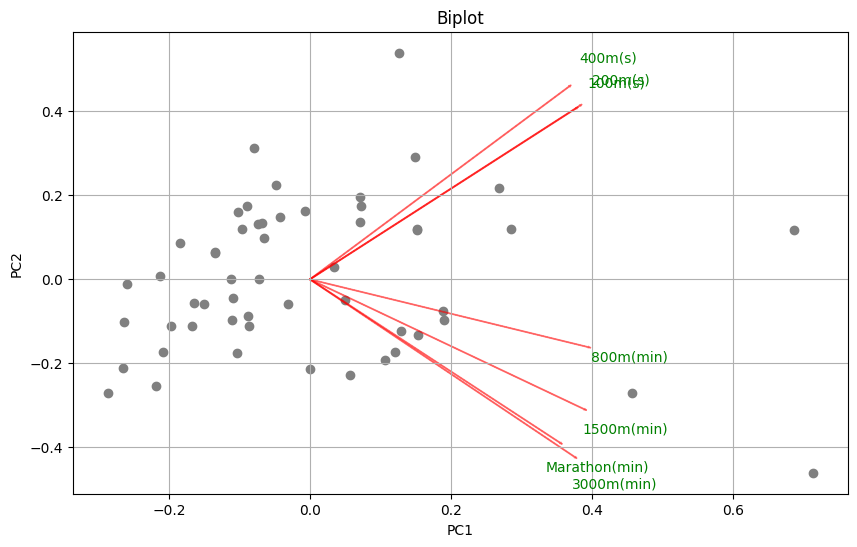

In [6]:
# Definir os nomes das colunas
tabela_1_9.columns = ["Country", "100m(s)", "200m(s)", "400m(s)", "800m(min)", "1500m(min)", "3000m(min)", "Marathon(min)"]

# Remover a coluna de países para realizar a PCA
dados = tabela_1_9.drop(columns=["Country"])

# Calcular a matriz de correlação
R = dados.corr()
print("Correlation Matrix:\n", R)

# Calcular autovalores e autovetores
eigen_values, eigen_vectors = np.linalg.eig(R)
print("Autovalores:\n", eigen_values)
print("Autovetores:\n", eigen_vectors)

# Realizar a PCA
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados)
pca = PCA(n_components=7)
pca_original = PCA(n_components=1) #para rankear depois
pca_result_original = pca_original.fit_transform(dados_scaled) #para rankear depois
pca_result = pca.fit_transform(dados_scaled)

# Variância explicada
explained_variance = pca.explained_variance_ratio_
print("Proporção da variância explicada por cada componente principal:\n", explained_variance)

# Biplot
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray')

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(10, 6))
biplot(pca_result, pca.components_.T, labels=dados.columns)
plt.title('Biplot')
plt.show()


In [7]:
dados_velocidade = pd.DataFrame()
dados_velocidade["100m(m/s)"] = 100 / dados["100m(s)"]
dados_velocidade["200m(m/s)"] = 200 / dados["200m(s)"]
dados_velocidade["400m(m/s)"] = 400 / dados["400m(s)"]
dados_velocidade["800m(m/s)"] = 800 / (dados["800m(min)"] * 60)
dados_velocidade["1500m(m/s)"] = 1500 / (dados["1500m(min)"] * 60)
dados_velocidade["3000m(m/s)"] = 3000 / (dados["3000m(min)"] * 60)
dados_velocidade["Marathon(m/s)"] = 42195 / (dados["Marathon(min)"] * 60)

dados_velocidade.head(3)

,100m(m/s),200m(m/s),400m(m/s),800m(m/s),1500m(m/s),3000m(m/s),Marathon(m/s)
0,8.643042,8.718396,7.619048,6.504065,5.882353,5.440696,4.678353
1,8.992806,8.996851,8.225375,6.734007,6.218905,5.793743,4.900355
2,8.968610,8.810573,7.902015,6.872852,6.172840,5.694761,4.556203


Covariance Matrix:
 [[0.09053826 0.09560635 0.09667244 0.06506402 0.0822198  0.09214221
  0.08109987]
 [0.09560635 0.11467144 0.1138699  0.07492487 0.09601895 0.10543645
  0.09331033]
 [0.09667244 0.1138699  0.13778886 0.0809409  0.09544299 0.10831645
  0.10188073]
 [0.06506402 0.07492487 0.0809409  0.07352284 0.08645423 0.09975466
  0.09430563]
 [0.0822198  0.09601895 0.09544299 0.08645423 0.1238405  0.14371481
  0.11845777]
 [0.09214221 0.10543645 0.10831645 0.09975466 0.14371481 0.17658433
  0.14656043]
 [0.08109987 0.09331033 0.10188073 0.09430563 0.11845777 0.14656043
  0.16671409]]
Autovalores:
 [0.73214696 0.08607185 0.03338003 0.01497734 0.00206554 0.00616758
 0.00885102]
Autovetores:
 [[-0.31024417  0.3759651  -0.09755628 -0.5847963  -0.13775753 -0.62433141
   0.04613051]
 [-0.35739481  0.43376925 -0.08896099 -0.32287531  0.31103524  0.68870961
   0.02977941]
 [-0.37873667  0.51873227  0.27424547  0.66667306 -0.13198849 -0.12377209
   0.1872734 ]
 [-0.29934048 -0.05313551  0.0

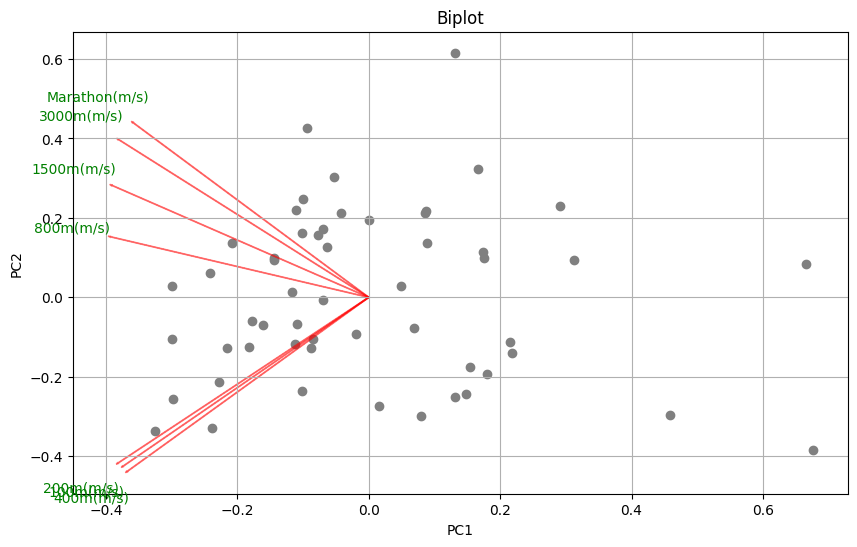

   Component  Variance_Explained  Cumulative_Variance_Explained
0          1            0.833184                       0.833184
1          2            0.092522                       0.925707
2          3            0.031380                       0.957087
3          4            0.018425                       0.975512
4          5            0.014247                       0.989759
5          6            0.008037                       0.997796
6          7            0.002204                       1.000000


In [8]:
# Calcular a matriz de covariância
cov_matrix = np.cov(dados_velocidade, rowvar=False)
print("Covariance Matrix:\n", cov_matrix)

# Calcular autovalores e autovetores
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("Autovalores:\n", eigen_values)
print("Autovetores:\n", eigen_vectors)

# Realizar a PCA
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados_velocidade)
pca = PCA(n_components=7)
pca_transformada = PCA(n_components=1) #para rankear depois
pca_result_transformada = pca_transformada.fit_transform(dados_scaled) #para rankear depois
pca_result = pca.fit_transform(dados_scaled)
print(pca_result)

# Variância explicada
explained_variance = pca.explained_variance_ratio_
print("Proporção da variância explicada por cada componente principal:\n", explained_variance)

# Função para o Biplot
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray')

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(10, 6))
biplot(pca_result, pca.components_.T, labels=dados_velocidade.columns)
plt.title('Biplot')
plt.show()

# Criar um dataframe com as variâncias explicadas
explained_variance_df = pd.DataFrame({
    'Component': range(1, len(explained_variance) + 1),
    'Variance_Explained': explained_variance,
    'Cumulative_Variance_Explained': np.cumsum(explained_variance)
})

# Exibir a tabela de variâncias explicadas
print(explained_variance_df)


In [9]:
# Adicionar a projeção da primeira componente principal ao DataFrame original
tabela_1_9['PCA1_Original'] = pca_result_original

# Classificar o DataFrame original com base na primeira componente principal
ranking_original = tabela_1_9[['Country', 'PCA1_Original']].sort_values(by='PCA1_Original', ascending=True)
ranking_original['Rank_Original'] = ranking_original['PCA1_Original'].rank(ascending=False)
print("Ranking baseado na primeira componente principal (DataFrame original):\n")
print("10 primeiros:\n", ranking_original[['Country']].head(10))
print("3 últimos:\n", ranking_original[['Country']].tail(3))

# Adicionar a projeção da primeira componente principal ao DataFrame original
tabela_1_9['PCA1_Transformada'] = pca_result_transformada

# Classificar o DataFrame original com base na primeira componente principal
ranking_transformada = tabela_1_9[['Country', 'PCA1_Transformada']].sort_values(by='PCA1_Transformada', ascending=True)
ranking_transformada['PCA1_Transformada'] = ranking_transformada['PCA1_Transformada'].rank(ascending=False)
print("Ranking baseado na primeira componente principal (DataFrame transformado):\n")
print("10 primeiros:\n", ranking_transformada[['Country']].head(10))
print("3 últimos:\n", ranking_transformada[['Country']].tail(3))

print("")

print("São iguais?")
if ranking_transformada['Country'].equals(ranking_original['Country']):
    print("Sim")
else:
    print("Não")


Ranking baseado na primeira componente principal (DataFrame original):

10 primeiros:
    Country
53     USA
17     GER
44     RUS
8      CHN
16     FRA
18     GBR
12     CZE
41     POL
43     ROM
1      AUS
3 últimos:
    Country
39     PNG
10     COK
45     SAM
Ranking baseado na primeira componente principal (DataFrame transformado):

10 primeiros:
    Country
53     USA
44     RUS
8      CHN
17     GER
18     GBR
16     FRA
12     CZE
41     POL
43     ROM
1      AUS
3 últimos:
    Country
39     PNG
10     COK
45     SAM

São iguais?
Não


## Parte 1 - Masculina

In [10]:
tabela2 = pd.read_table('/kaggle/input/recordes-de-corrida/tabela8.6.txt',header=None,delim_whitespace=True)
tabela2.head(3)

/tmp/ipykernel_33/1906928616.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tabela2 = pd.read_table('/kaggle/input/recordes-de-corrida/tabela8.6.txt',header=None,delim_whitespace=True)


,0,1,2,3,4,5,6,7,8
0,Argentina,10.23,20.37,46.18,1.77,3.68,13.33,27.65,129.57
1,Australia,9.93,20.06,44.38,1.74,3.53,12.93,27.53,127.51
2,Austria,10.15,20.45,45.80,1.77,3.58,13.26,27.72,132.22


Correlation Matrix:
                 100m(s)   200m(s)   400m(s)  800m(min)  1500m(min)  \
100m(s)        1.000000  0.914755  0.804115   0.711939    0.765792   
200m(s)        0.914755  1.000000  0.844916   0.796916    0.795087   
400m(s)        0.804115  0.844916  1.000000   0.767749    0.771552   
800m(min)      0.711939  0.796916  0.767749   1.000000    0.895761   
1500m(min)     0.765792  0.795087  0.771552   0.895761    1.000000   
5000m(min)     0.739880  0.761303  0.779693   0.860696    0.916522   
10000m(min)    0.714792  0.747952  0.765748   0.843107    0.901338   
Marathon(min)  0.676487  0.721116  0.712682   0.806966    0.877779   

               5000m(min)  10000m(min)  Marathon(min)  
100m(s)          0.739880     0.714792       0.676487  
200m(s)          0.761303     0.747952       0.721116  
400m(s)          0.779693     0.765748       0.712682  
800m(min)        0.860696     0.843107       0.806966  
1500m(min)       0.916522     0.901338       0.877779  
5000m(min)  

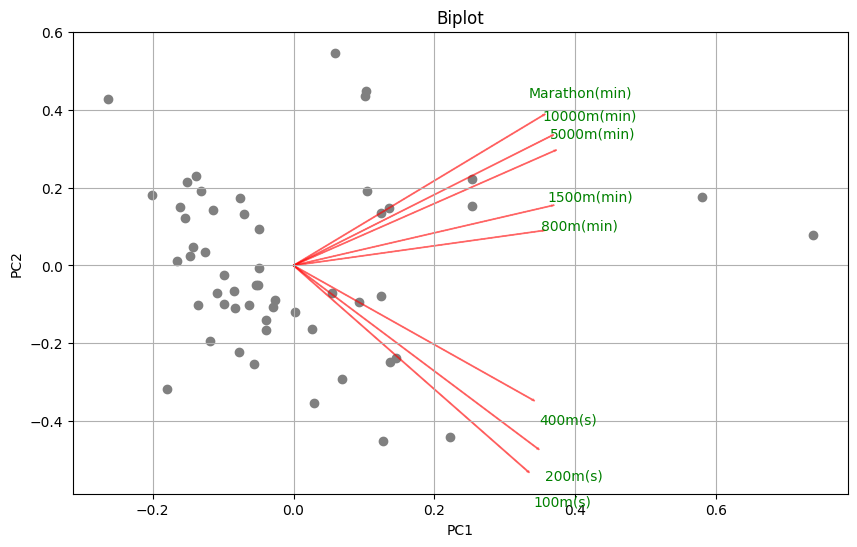

In [11]:
# Definir os nomes das colunas
tabela2.columns = ["Country", "100m(s)", "200m(s)", "400m(s)", "800m(min)", '1500m(min)','5000m(min)','10000m(min)', "Marathon(min)"]

# Remover a coluna de países para realizar a PCA
dados = tabela2.drop(columns=["Country"])

# Calcular a matriz de correlação
R = dados.corr()
print("Correlation Matrix:\n", R)

# Calcular autovalores e autovetores
eigen_values, eigen_vectors = np.linalg.eig(R)
print("Autovalores:\n", eigen_values)
print("Autovetores:\n", eigen_vectors)

# Realizar a PCA
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados)
pca = PCA(n_components=8)
pca_original = PCA(n_components=1) #para rankear depois
pca_result_original = pca_original.fit_transform(dados_scaled) #para rankear depois
pca_result = pca.fit_transform(dados_scaled)

# Variância explicada
explained_variance = pca.explained_variance_ratio_
print("Proporção da variância explicada por cada componente principal:\n", explained_variance)

# Biplot
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray')

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(10, 6))
biplot(pca_result, pca.components_.T, labels=dados.columns)
plt.title('Biplot')
plt.show()


In [12]:
dados_velocidade = pd.DataFrame()
dados_velocidade["100m(m/s)"] = 100 / dados["100m(s)"]
dados_velocidade["200m(m/s)"] = 200 / dados["200m(s)"]
dados_velocidade["400m(m/s)"] = 400 / dados["400m(s)"]
dados_velocidade["800m(m/s)"] = 800 / (dados["800m(min)"] * 60)
dados_velocidade["1500m(m/s)"] = 1500 / (dados["1500m(min)"] * 60)
dados_velocidade["5000m(m/s)"] = 5000 / (dados["5000m(min)"] * 60)
dados_velocidade["10000m(m/s)"] = 10000 / (dados["10000m(min)"] * 60)
dados_velocidade["Marathon(m/s)"] = 42195 / (dados["Marathon(min)"] * 60)

dados_velocidade.head(3)

,100m(m/s),200m(m/s),400m(m/s),800m(m/s),1500m(m/s),5000m(m/s),10000m(m/s),Marathon(m/s)
0,9.775171,9.818360,8.661758,7.532957,6.793478,6.251563,6.027728,5.427568
1,10.070493,9.970090,9.013069,7.662835,7.082153,6.444960,6.054002,5.515254
2,9.852217,9.779951,8.733624,7.532957,6.983240,6.284565,6.012506,5.318787


Covariance Matrix:
 [[0.0434979  0.04827718 0.04346323 0.03149513 0.04250343 0.04692523
  0.04483253 0.04312562]
 [0.04827718 0.06484523 0.0558678  0.04323338 0.05352645 0.0587731
  0.05725123 0.05629446]
 [0.04346323 0.0558678  0.06882169 0.04282214 0.05372066 0.06176643
  0.05993536 0.05673423]
 [0.03149513 0.04323338 0.04282214 0.046884   0.05230584 0.05715598
  0.05539454 0.05419108]
 [0.04250343 0.05352645 0.05372066 0.05230584 0.072914   0.07663884
  0.07457187 0.07365179]
 [0.04692523 0.0587731  0.06176643 0.05715598 0.07663884 0.0959398
  0.09373567 0.09058189]
 [0.04483253 0.05725123 0.05993536 0.05539454 0.07457187 0.09373567
  0.09428944 0.09099518]
 [0.04312562 0.05629446 0.05673423 0.05419108 0.07365179 0.09058189
  0.09099518 0.09792763]]
Autovalores:
 [0.49404995 0.0462238  0.01391228 0.0133208  0.00112071 0.00322038
 0.00752255 0.00574921]
Autovetores:
 [[-0.24397014  0.43237108  0.17274803 -0.44964279 -0.11852436  0.5837996
  -0.39041927  0.11923129]
 [-0.31138274  0.5

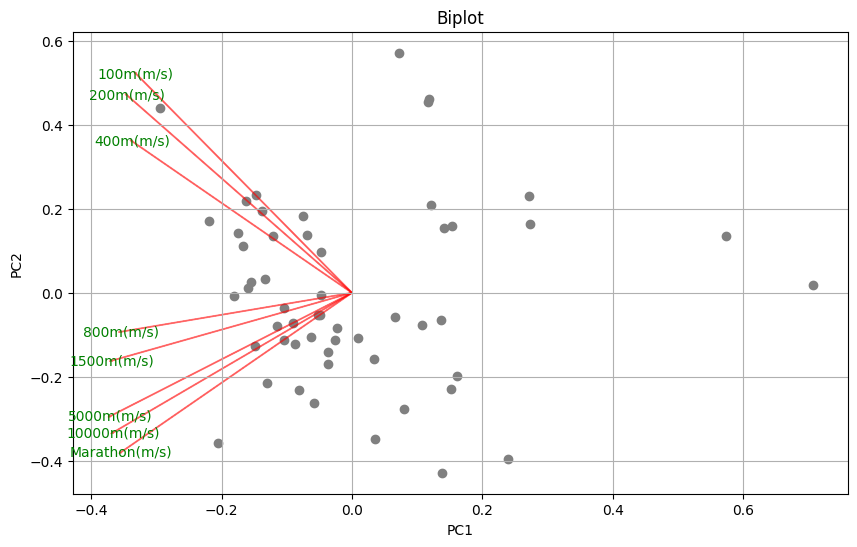

   Component  Variance_Explained  Cumulative_Variance_Explained
0          1            0.828219                       0.828219
1          2            0.084568                       0.912787
2          3            0.029865                       0.942651
3          4            0.026806                       0.969457
4          5            0.013453                       0.982910
5          6            0.008911                       0.991821
6          7            0.006690                       0.998510
7          8            0.001490                       1.000000


In [13]:
# Calcular a matriz de covariância
cov_matrix = np.cov(dados_velocidade, rowvar=False)
print("Covariance Matrix:\n", cov_matrix)

# Calcular autovalores e autovetores
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)
print("Autovalores:\n", eigen_values)
print("Autovetores:\n", eigen_vectors)

# Realizar a PCA
scaler = StandardScaler()
dados_scaled = scaler.fit_transform(dados_velocidade)
pca = PCA(n_components=8) 
pca_transformada = PCA(n_components=1) #para rankear depois
pca_result_transformada = pca_transformada.fit_transform(dados_scaled) #para rankear depois
pca_result = pca.fit_transform(dados_scaled)
print(pca_result)

# Variância explicada
explained_variance = pca.explained_variance_ratio_
print("Proporção da variância explicada por cada componente principal:\n", explained_variance)

# Função para o Biplot
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='gray')

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1, coeff[i,1] * 1, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i,0]* 1, coeff[i,1] * 1, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

plt.figure(figsize=(10, 6))
biplot(pca_result, pca.components_.T, labels=dados_velocidade.columns)
plt.title('Biplot')
plt.show()


# Criar um dataframe com as variâncias explicadas
explained_variance_df = pd.DataFrame({
    'Component': range(1, len(explained_variance) + 1),
    'Variance_Explained': explained_variance,
    'Cumulative_Variance_Explained': np.cumsum(explained_variance)
})

# Exibir a tabela de variâncias explicadas
print(explained_variance_df)


In [14]:
# Adicionar a projeção da primeira componente principal ao DataFrame original
tabela2['PCA1_Original'] = pca_result_original
# Classificar o DataFrame original com base na primeira componente principal
ranking_original = tabela2[['Country', 'PCA1_Original']].sort_values(by='PCA1_Original', ascending=True)
ranking_original['Rank_Original'] = ranking_original['PCA1_Original'].rank(ascending=False)
print("Ranking baseado na primeira componente principal (DataFrame original):\n")
print("10 primeiros:\n", ranking_original[['Country']].head(10))
print("3 últimos:\n", ranking_original[['Country']].tail(3))

# Adicionar a projeção da primeira componente principal ao DataFrame original
tabela2['PCA1_Transformada'] = pca_result_transformada

# Classificar o DataFrame original com base na primeira componente principal
ranking_transformada = tabela2[['Country', 'PCA1_Transformada']].sort_values(by='PCA1_Transformada', ascending=True)
ranking_transformada['PCA1_Transformada'] = ranking_transformada['PCA1_Transformada'].rank(ascending=False)
print("Ranking baseado na primeira componente principal (DataFrame transformado):\n")
print("10 primeiros:\n", ranking_transformada[['Country']].head(10))
print("3 últimos:\n", ranking_transformada[['Country']].tail(3))

print("")

print("São iguais?")
if ranking_transformada['Country'].equals(ranking_original['Country']):
    print("Sim")
else:
    print("Não")


Ranking baseado na primeira componente principal (DataFrame original):

10 primeiros:
          Country
53           USA
18  GreatBritain
28         Kenya
16        France
1      Australia
26         Italy
5         Brazil
17       Germany
42      Portugal
6         Canada
3 últimos:
         Country
46    Singapore
45        Samoa
10  CookIslands
Ranking baseado na primeira componente principal (DataFrame transformado):

10 primeiros:
          Country
53           USA
18  GreatBritain
28         Kenya
16        France
1      Australia
26         Italy
5         Brazil
17       Germany
42      Portugal
3        Belgium
3 últimos:
         Country
46    Singapore
45        Samoa
10  CookIslands

São iguais?
Não
